# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

plt.rcParams["figure.figsize"] = (10, 6)
sns.set(style="whitegrid")


# Load Data

In [2]:
# Load dataset
df = pd.read_excel("D:\Downloads\Case_Study_Input_File 1 (1).xlsx")

# Preview
print(df.head())
print(df.info())


        date  kpi_val_sales_mn  vol_sales_mn  wtd_dist_max  num_dist_max  \
0 2019-01-01        232.467056       302.394     60.339142     28.076869   
1 2019-02-01        214.927168       279.889     60.897473     28.184146   
2 2019-03-01        243.621484       318.025     60.356401     28.494586   
3 2019-04-01        251.191704       328.868     58.884626     28.637880   
4 2019-05-01        243.752604       318.636     60.130245     28.579280   

   trade_promo_spends_mn  consumer_promo_spends_mn  newspaper_spends_mn  \
0               6.386184                  0.000000             0.000000   
1               6.903101                  0.000000             4.558687   
2               6.378913                  0.000000             5.228202   
3               6.807898                  0.960220             0.000000   
4               4.139811                  0.770213             0.000000   

   newspaper_impressions  tv_total_grp  ...  whatsapp_clicks  \
0                      0    

# Basic Data Cleaning

In [3]:
# Check missing values
print(df.isnull().sum())

# Fill missing values if any (basic approach)
df.fillna(0, inplace=True)


date                                  0
kpi_val_sales_mn                      0
vol_sales_mn                          0
wtd_dist_max                          0
num_dist_max                          0
trade_promo_spends_mn                 0
consumer_promo_spends_mn              0
newspaper_spends_mn                   0
newspaper_impressions                 0
tv_total_grp                          0
tv_spots                              0
tv_total_spends_mn                    0
competition1_newspaper_spends_mn      0
competition1_newspaper_impressions    0
competition1_tv_total_grp             0
competition1_tv_spots                 0
competition1_tv_total_spends_mn       0
competition2_newspaper_spends_mn      0
competition2_newspaper_impressions    0
competition2_tv_total_grp             0
competition2_tv_spots                 0
competition2_tv_total_spends_mn       0
google_display_clicks                 0
google_display_impressions_mn         0
google_display_spends_mn              0


# Identify Target & Media Channels

In [9]:
target = "kpi_val_sales_mn"

non_media_cols = [
    "date",
    "kpi_val_sales_mn",
    "vol_sales_mn",
    "wtd_dist_max",
    "num_dist_max"
]

media_channels = [col for col in df.columns if col not in non_media_cols]

print("Target:", target)
print("Media Channels:", media_channels)


Target: kpi_val_sales_mn
Media Channels: ['trade_promo_spends_mn', 'consumer_promo_spends_mn', 'newspaper_spends_mn', 'newspaper_impressions', 'tv_total_grp', 'tv_spots', 'tv_total_spends_mn', 'competition1_newspaper_spends_mn', 'competition1_newspaper_impressions', 'competition1_tv_total_grp', 'competition1_tv_spots', 'competition1_tv_total_spends_mn', 'competition2_newspaper_spends_mn', 'competition2_newspaper_impressions', 'competition2_tv_total_grp', 'competition2_tv_spots', 'competition2_tv_total_spends_mn', 'google_display_clicks', 'google_display_impressions_mn', 'google_display_spends_mn', 'youtube_clicks', 'youtube_impressions_mn', 'youtube_spends_mn', 'fb_ig_clicks', 'fb_ig_impressions_mn', 'fb_ig_spends_mn', 'whatsapp_clicks', 'whatsapp_impressions_mn', 'whatsapp_spends_mn', 'jio_clicks', 'jio_impressions_mn', 'jio_spends_mn', 'hotstar_clicks', 'hotstar_impressions_mn', 'hotstar_spends_mn', 'ventes_avenue_spends_mn']


# Exploratory Data Analysis (EDA)

## Sales Trend

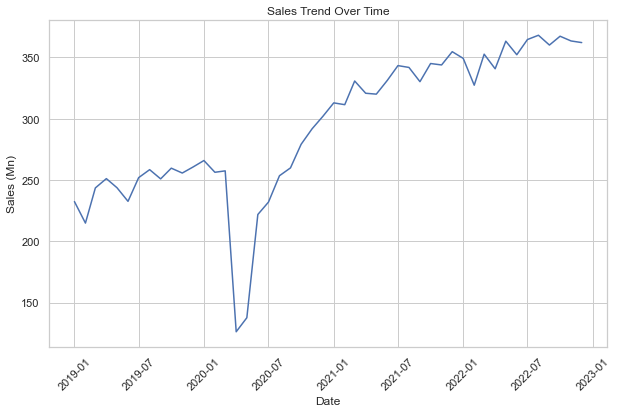

In [10]:
plt.plot(df["date"], df[target])
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Sales (Mn)")
plt.xticks(rotation=45)
plt.show()


## Media Spend Trends

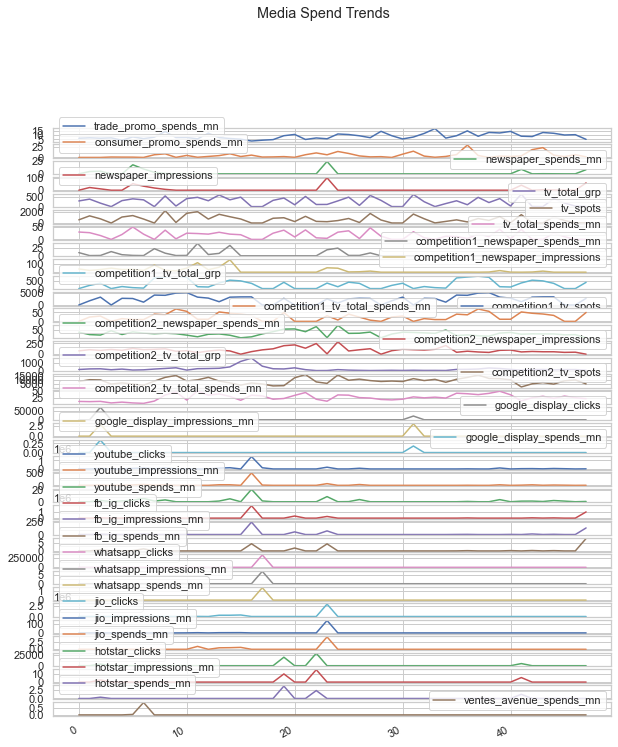

In [11]:
df[media_channels].plot(subplots=True, layout=(len(media_channels),1), figsize=(10,12))
plt.suptitle("Media Spend Trends", y=1.02)
plt.show()


## Correlation Analysis

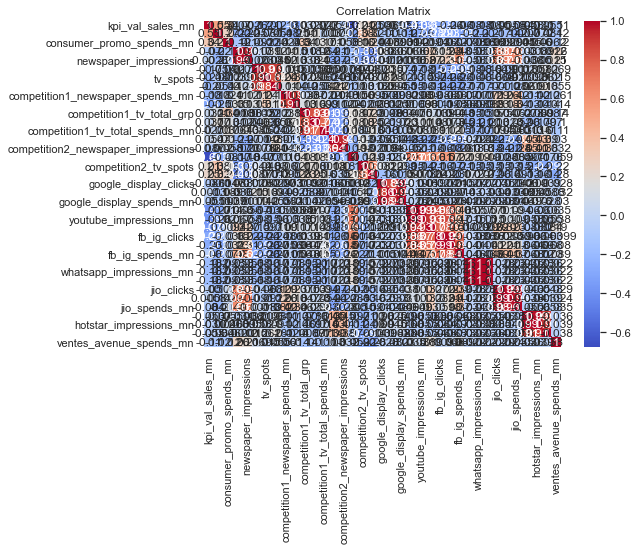

In [12]:
corr = df[[target] + media_channels].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


# Multicollinearity Check (VIF)

In [13]:
X_vif = df[media_channels]
X_vif = sm.add_constant(X_vif)

vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i)
    for i in range(X_vif.shape[1])
]

print(vif_data)


                               Feature          VIF
0                                const    80.034227
1                trade_promo_spends_mn     2.971855
2             consumer_promo_spends_mn     2.782587
3                  newspaper_spends_mn   250.124491
4                newspaper_impressions   291.832945
5                         tv_total_grp    51.662147
6                             tv_spots    24.715191
7                   tv_total_spends_mn    34.884963
8     competition1_newspaper_spends_mn    27.794631
9   competition1_newspaper_impressions    22.360880
10           competition1_tv_total_grp    29.676695
11               competition1_tv_spots     8.427492
12     competition1_tv_total_spends_mn    31.068465
13    competition2_newspaper_spends_mn    36.851508
14  competition2_newspaper_impressions    27.278096
15           competition2_tv_total_grp    18.846459
16               competition2_tv_spots     6.434184
17     competition2_tv_total_spends_mn    10.718479
18          

C:\Users\Mukund\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


# Train-Test Split (Time-based)

In [14]:
split_ratio = 0.8
split_index = int(len(df) * split_ratio)

train = df.iloc[:split_index]
test = df.iloc[split_index:]


# OLS Market Mix Model

In [15]:
X_train = train[media_channels]
y_train = train[target]

X_train = sm.add_constant(X_train)

ols_model = sm.OLS(y_train, X_train).fit()

print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:       kpi_val_sales_mn   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     41.92
Date:                Sun, 21 Dec 2025   Prob (F-statistic):           0.000279
Time:                        15:06:24   Log-Likelihood:                -98.970
No. Observations:                  38   AIC:                             263.9
Df Residuals:                       5   BIC:                             318.0
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

# Model Validation

<ipython-input-16-94bd7ff07cb7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predicted_Sales"] = ols_model.predict(X_test)


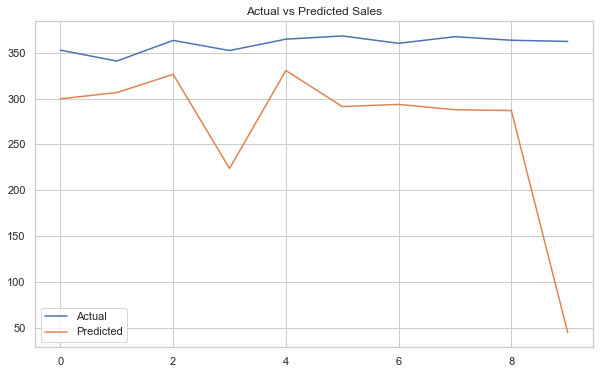

In [16]:
X_test = sm.add_constant(test[media_channels])
test["Predicted_Sales"] = ols_model.predict(X_test)

plt.plot(test[target].values, label="Actual")
plt.plot(test["Predicted_Sales"].values, label="Predicted")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.show()


# Channel Contribution Calculation

In [17]:
coefficients = ols_model.params.drop("const")

contribution_df = pd.DataFrame({
    "Channel": coefficients.index,
    "Coefficient": coefficients.values,
    "Total Spend": train[coefficients.index].sum()
})

contribution_df["Contribution"] = (
    contribution_df["Coefficient"] * contribution_df["Total Spend"]
)

print(contribution_df)


                                                               Channel  \
trade_promo_spends_mn                            trade_promo_spends_mn   
consumer_promo_spends_mn                      consumer_promo_spends_mn   
newspaper_spends_mn                                newspaper_spends_mn   
newspaper_impressions                            newspaper_impressions   
tv_total_grp                                              tv_total_grp   
tv_spots                                                      tv_spots   
tv_total_spends_mn                                  tv_total_spends_mn   
competition1_newspaper_spends_mn      competition1_newspaper_spends_mn   
competition1_newspaper_impressions  competition1_newspaper_impressions   
competition1_tv_total_grp                    competition1_tv_total_grp   
competition1_tv_spots                            competition1_tv_spots   
competition1_tv_total_spends_mn        competition1_tv_total_spends_mn   
competition2_newspaper_spends_mn      

# ROI Calculation

In [18]:
contribution_df["ROI"] = (
    contribution_df["Contribution"] / contribution_df["Total Spend"]
)

print(contribution_df.sort_values("ROI", ascending=False))


                                                               Channel  \
google_display_impressions_mn            google_display_impressions_mn   
newspaper_spends_mn                                newspaper_spends_mn   
jio_spends_mn                                            jio_spends_mn   
fb_ig_impressions_mn                              fb_ig_impressions_mn   
competition1_newspaper_spends_mn      competition1_newspaper_spends_mn   
hotstar_spends_mn                                    hotstar_spends_mn   
google_display_spends_mn                      google_display_spends_mn   
consumer_promo_spends_mn                      consumer_promo_spends_mn   
competition2_newspaper_impressions  competition2_newspaper_impressions   
competition2_tv_total_spends_mn        competition2_tv_total_spends_mn   
tv_total_grp                                              tv_total_grp   
competition1_tv_spots                            competition1_tv_spots   
competition1_tv_total_grp             

# Visualization – Contribution & ROI

## Contribution

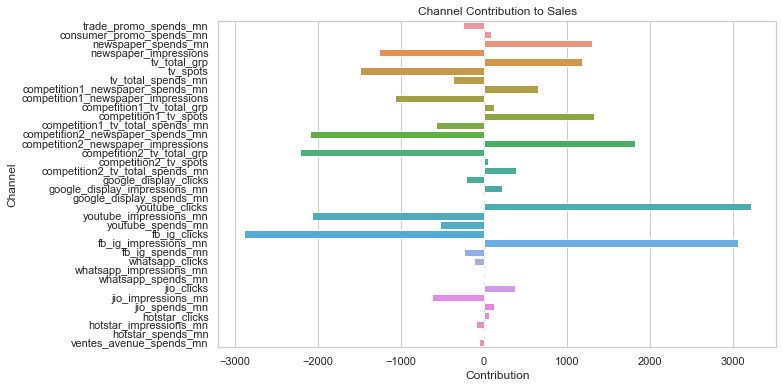

In [19]:
sns.barplot(
    data=contribution_df,
    x="Contribution",
    y="Channel"
)
plt.title("Channel Contribution to Sales")
plt.show()


## ROI

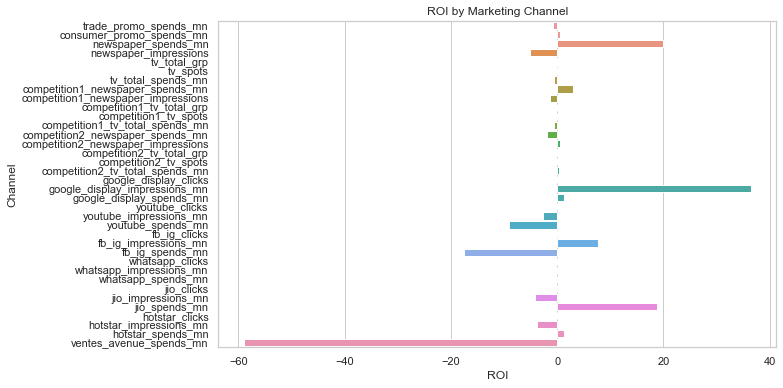

In [20]:
sns.barplot(
    data=contribution_df,
    x="ROI",
    y="Channel"
)
plt.title("ROI by Marketing Channel")
plt.show()


# Budget Optimization Recommendation

In [21]:
recommendation_df = contribution_df.copy()

recommendation_df["Recommendation"] = np.where(
    recommendation_df["ROI"] > recommendation_df["ROI"].mean(),
    "Increase / Maintain Spend",
    "Reduce / Optimize Spend"
)

print(recommendation_df[["Channel", "ROI", "Recommendation"]])


                                                               Channel  \
trade_promo_spends_mn                            trade_promo_spends_mn   
consumer_promo_spends_mn                      consumer_promo_spends_mn   
newspaper_spends_mn                                newspaper_spends_mn   
newspaper_impressions                            newspaper_impressions   
tv_total_grp                                              tv_total_grp   
tv_spots                                                      tv_spots   
tv_total_spends_mn                                  tv_total_spends_mn   
competition1_newspaper_spends_mn      competition1_newspaper_spends_mn   
competition1_newspaper_impressions  competition1_newspaper_impressions   
competition1_tv_total_grp                    competition1_tv_total_grp   
competition1_tv_spots                            competition1_tv_spots   
competition1_tv_total_spends_mn        competition1_tv_total_spends_mn   
competition2_newspaper_spends_mn      

In [22]:
contribution_df.to_csv("MMM_Channel_Contribution_ROI.csv", index=False)
